# Santander Customer Satisfaction using Decision Tree Classifier

## Importing the libraries

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
import seaborn as sns

## Importing Training Datatset

In [40]:
TrainData = pd.read_csv ("C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Train.csv")
TrainData.head()


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

## Exploratory Data Analysis

In [7]:
TrainData.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [8]:
TrainData.count()

ID                         76020
var3                       76020
var15                      76020
imp_ent_var16_ult1         76020
imp_op_var39_comer_ult1    76020
                           ...  
saldo_medio_var44_hace3    76020
saldo_medio_var44_ult1     76020
saldo_medio_var44_ult3     76020
var38                      76020
TARGET                     76020
Length: 371, dtype: int64

## Descriptive Statistics

In [15]:
TrainData.describe().transpose()

count           mean            std        min  \
ID                       76020.0   75964.050723   43781.947379       1.00   
var3                     76020.0   -1523.199277   39033.462364 -999999.00   
var15                    76020.0      33.212865      12.956486       5.00   
imp_ent_var16_ult1       76020.0      86.208265    1614.757313       0.00   
imp_op_var39_comer_ult1  76020.0      72.363067     339.315831       0.00   
...                          ...            ...            ...        ...   
saldo_medio_var44_hace3  76020.0       1.858575     147.786584       0.00   
saldo_medio_var44_ult1   76020.0      76.026165    4040.337842       0.00   
saldo_medio_var44_ult3   76020.0      56.614351    2852.579397       0.00   
var38                    76020.0  117235.809430  182664.598503    5163.75   
TARGET                   76020.0       0.039569       0.194945       0.00   

                                25%        50%          75%          max  
ID                       38104.7500   76043.00  113748.7500    151838.00  
var3                         2.0000       2.00       2.0000       238.00  
var15                       23.0000      28.00      40.0000       105.00  
imp_ent_var16_ult1           0.0000       0.00       0.0000    210000.00  
imp_op_var39_comer_ult1      0.0000       0.00       0.0000     12888.03  
...                             ...        ...          ...          ...  
saldo_medio_var44_hace3      0.0000       0.00       0.0000     24650.01  
saldo_medio_var44_ult1       0.0000       0.00       0.0000    681462.90  
saldo_medio_var44_ult3       0.0000       0.00       0.0000    397884.30  
var38                    67870.6125  106409.16  118756.2525  22034738.76  
TARGET                       0.0000       0.00       0.0000         1.00  

[371 rows x 8 columns]

## Column Data types

In [9]:
TrainData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


### There are no catagorical variables

## Missing Values in Dataset

In [10]:
TrainData.isna().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

### There are no NULL / NA values

## Analysying Column -  imp_op_var39_comer_ult1

### Data for column imp_op_var39_comer_ult1 is left skewed

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imp_op_var39_comer_ult1'>

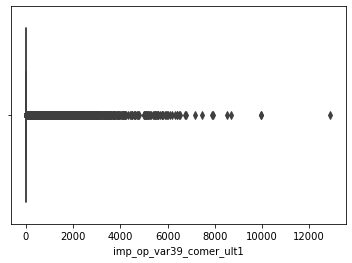

In [17]:
sns.boxplot(TrainData.imp_op_var39_comer_ult1)

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


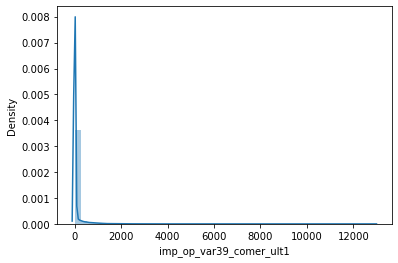

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


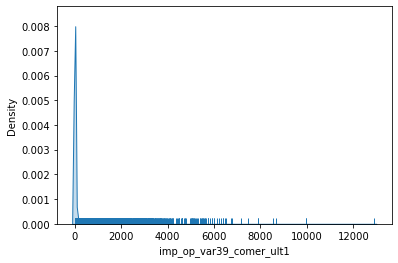

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


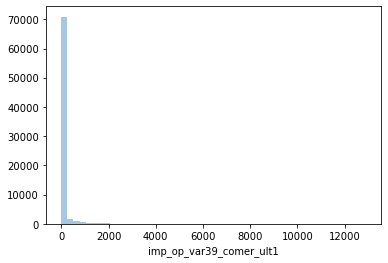

<Figure size 432x288 with 0 Axes>

In [20]:
#Plots to check distribution of the variables
sns.distplot(TrainData.imp_op_var39_comer_ult1)
plt.show()
plt.clf()
sns.distplot(TrainData.imp_op_var39_comer_ult1,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(TrainData.imp_op_var39_comer_ult1,
            kde= False)
plt.show()
plt.clf()

### The histogram depicts most the values are 0's in this column

## Correlation among variables 

### Variable 40 

In [11]:
Corr_df = TrainData[["imp_op_var40_comer_ult1",
"imp_op_var40_comer_ult3",
"imp_op_var40_efect_ult1",
"imp_op_var40_efect_ult3",
"imp_op_var40_ult1",
]]

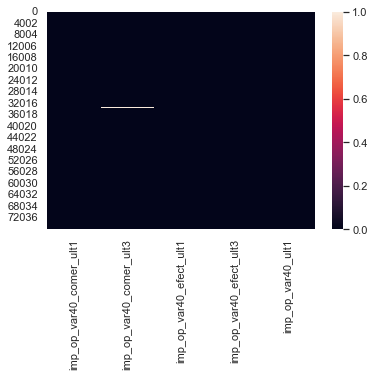

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()
ax = sns.heatmap(Corr_df, vmin=0, vmax=1)
plt.show()

## Variable 41

In [14]:
Corr_df2 = TrainData[['imp_op_var41_comer_ult1',
'imp_op_var41_comer_ult3',
'imp_op_var41_efect_ult1',
'imp_op_var41_efect_ult3',
'imp_op_var41_ult1'
]]

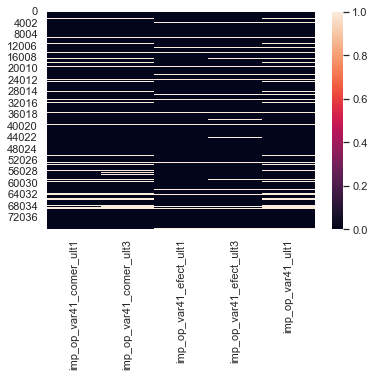

In [15]:
np.random.seed(0)
sns.set()
ax = sns.heatmap(Corr_df2, vmin=0, vmax=1)
plt.show()

## Variable 38 

In [17]:
TrainData.var38


0         39205.170000
1         49278.030000
2         67333.770000
3         64007.970000
4        117310.979016
             ...      
76015     60926.490000
76016    118634.520000
76017     74028.150000
76018     84278.160000
76019    117310.979016
Name: var38, Length: 76020, dtype: float64

In [ ]:
var38

## Checking percentage of missing values

In [20]:
percent_missing = TrainData.isnull().sum() * 100 / len(TrainData)
missing_value_df = pd.DataFrame({'column_name': TrainData.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
ID                                            ID              0.0
var3                                        var3              0.0
var15                                      var15              0.0
imp_ent_var16_ult1            imp_ent_var16_ult1              0.0
imp_op_var39_comer_ult1  imp_op_var39_comer_ult1              0.0
...                                          ...              ...
saldo_medio_var44_hace3  saldo_medio_var44_hace3              0.0
saldo_medio_var44_ult1    saldo_medio_var44_ult1              0.0
saldo_medio_var44_ult3    saldo_medio_var44_ult3              0.0
var38                                      var38              0.0
TARGET                                    TARGET              0.0

[371 rows x 2 columns]

## Data is Sparse hence checking the Percentage of 0's in each column

In [24]:
print('Percentage of cols with zeros')
print((TrainData[TrainData == 0].count(axis=0)*100)/len(TrainData.index))

Percentage of cols with zeros
ID                          0.000000
var3                        0.098658
var15                       0.000000
imp_ent_var16_ult1         95.107866
imp_op_var39_comer_ult1    86.917916
                             ...    
saldo_medio_var44_hace3    99.957906
saldo_medio_var44_ult1     99.814522
saldo_medio_var44_ult3     99.814522
var38                       0.000000
TARGET                     96.043147
Length: 371, dtype: float64


In [26]:
zero_df = (TrainData[TrainData == 0].count(axis=0)*100)/len(TrainData.index)

In [27]:
#exporting to excel to check percentage of zero's 
zero_df.to_csv('C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Zero_df.csv')

## Var 38 - Analysis

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


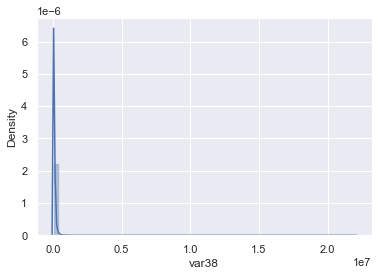

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


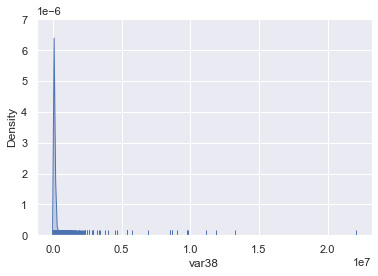

C:\Users\akorade1\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


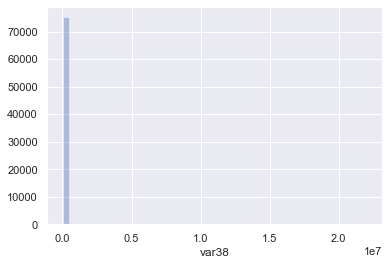

<Figure size 432x288 with 0 Axes>

In [16]:
sns.distplot(TrainData.var38)
plt.show()
plt.clf()
sns.distplot(TrainData.var38,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(TrainData.var38,
            kde= False)
plt.show()
plt.clf()

### Column Var 38 has 0 percent missing values but the data is highly right skewed

## Plotting the relationship between var38 and Target Column

In [5]:
plot_df = TrainData[["var38","TARGET"]]

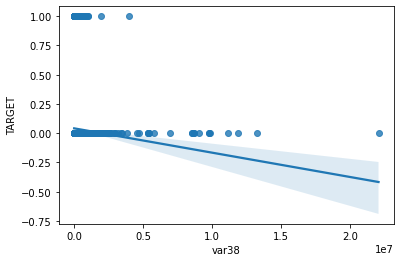

<Figure size 432x288 with 0 Axes>

In [11]:
sns.regplot(data=plot_df,
            y='TARGET',
            x="var38")

plt.show()
plt.clf()

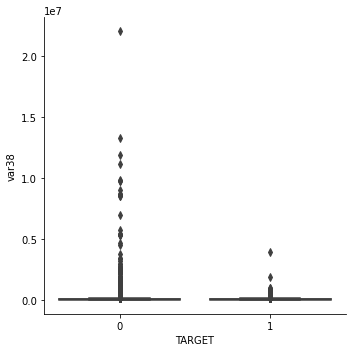

In [13]:
sns.catplot(data=plot_df, x="TARGET", y="var38", kind="box")

## Target Column

In [28]:
TrainData.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

<AxesSubplot:>

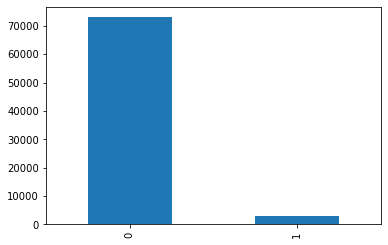

In [14]:
TrainData.TARGET.value_counts().plot(kind='bar')

# 96% of Target data is 0. There are only 4% 1's implying there is a class imbalance 

### Dropping columns where 100% data is 0

In [41]:
Train_new = TrainData.drop(columns = ["ID","ind_var2_0",
"ind_var2",
"ind_var27_0",
"ind_var28_0",
"ind_var28",
"ind_var27",
"ind_var41",
"ind_var46_0",
"ind_var46",
"num_var27_0",
"num_var28_0",
"num_var28",
"num_var27",
"num_var41",
"num_var46_0",
"num_var46",
"saldo_var28",
"saldo_var27",
"saldo_var41",
"saldo_var46",
"imp_amort_var18_hace3",
"imp_amort_var34_hace3",
"imp_reemb_var13_hace3",
"imp_reemb_var33_hace3",
"imp_trasp_var17_out_hace3",
"imp_trasp_var33_out_hace3",
"num_var2_0_ult1",
"num_var2_ult1",
"num_reemb_var13_hace3",
"num_reemb_var33_hace3",
"num_trasp_var17_out_hace3",
"num_trasp_var33_out_hace3",
"saldo_var2_ult1",
"saldo_medio_var13_medio_hace3",
"delta_imp_reemb_var33_1y3",
"delta_imp_trasp_var33_out_1y3",
"delta_num_reemb_var33_1y3",
"delta_num_trasp_var33_out_1y3",
"imp_reemb_var17_hace3",
"imp_reemb_var33_ult1",
"imp_trasp_var33_out_ult1",
"num_reemb_var17_hace3",
"num_reemb_var33_ult1",
"num_trasp_var33_out_ult1",
"saldo_medio_var29_hace3",
"ind_var6",
"ind_var13_medio_0",
"ind_var13_medio",
"ind_var18_0",
"ind_var18",
"ind_var29",
"ind_var34_0",
"ind_var34",
"num_var6",
"num_var13_medio_0",
"num_var13_medio",
"num_var18_0",
"num_var18",
"num_var29",
"num_var34_0",
"num_var34",
"saldo_var6",
"saldo_var13_medio",
"saldo_var18",
"saldo_var29",
"saldo_var34",
"delta_imp_amort_var18_1y3",
"delta_imp_amort_var34_1y3",
"imp_amort_var18_ult1",
"imp_amort_var34_ult1",
"imp_trasp_var17_in_hace3",
"num_meses_var13_medio_ult3",
"num_trasp_var17_in_hace3",
"saldo_medio_var13_medio_hace2",
"saldo_medio_var13_medio_ult1",
"saldo_medio_var13_medio_ult3",
"imp_var7_emit_ult1",
"imp_venta_var44_hace3",
"ind_var7_emit_ult1",
"num_var7_emit_ult1",
"num_venta_var44_hace3",
"saldo_medio_var29_ult1",
"saldo_medio_var29_ult3",
"delta_imp_trasp_var17_out_1y3",
"delta_num_trasp_var17_out_1y3",
"imp_trasp_var17_in_ult1",
"imp_trasp_var17_out_ult1",
"num_trasp_var17_in_ult1",
"num_trasp_var17_out_ult1",
"saldo_medio_var29_hace2",
"imp_trasp_var33_in_ult1",
"num_meses_var29_ult3",
"num_trasp_var33_in_ult1",
"delta_imp_trasp_var17_in_1y3",
"delta_num_trasp_var17_in_1y3",
"imp_trasp_var33_in_hace3",
"num_trasp_var33_in_hace3",
"num_op_var40_hace3",
"imp_aport_var33_ult1",
"num_aport_var33_ult1",
"ind_var6_0",
"ind_var29_0",
"num_var6_0",
"num_var29_0",
"delta_imp_trasp_var33_in_1y3",
"delta_num_trasp_var33_in_1y3",
"saldo_medio_var17_hace3",
"delta_num_aport_var33_1y3",
"imp_reemb_var17_ult1",
"num_reemb_var17_ult1",
"delta_imp_reemb_var17_1y3",
"delta_num_reemb_var17_1y3",
"imp_aport_var17_hace3",
"num_aport_var17_hace3",
"imp_aport_var33_hace3",
"num_aport_var33_hace3",
"delta_imp_aport_var33_1y3",
"saldo_medio_var33_hace3",
"imp_compra_var44_hace3",
"num_compra_var44_hace3",
"saldo_medio_var44_hace3",
"imp_op_var40_efect_ult1",
"delta_imp_reemb_var13_1y3",
"delta_num_reemb_var13_1y3",
"imp_reemb_var13_ult1",
"num_op_var40_efect_ult1",
"num_reemb_var13_ult1",
"saldo_medio_var33_hace2",
"imp_aport_var17_ult1",
"imp_venta_var44_ult1",
"num_aport_var17_ult1",
"num_venta_var44_ult1",
"imp_op_var40_efect_ult3",
"delta_imp_venta_var44_1y3",
"delta_num_venta_var44_1y3",
"num_op_var40_efect_ult3",
"ind_var33",
"num_var33",
"saldo_var33",
"num_meses_var33_ult3",
"saldo_medio_var33_ult1",
"saldo_medio_var33_ult3",
"ind_var33_0",
"num_var33_0",
"delta_num_aport_var17_1y3",
"delta_imp_aport_var17_1y3",
"ind_var32_0",
"ind_var32",
"num_var32_0",
"num_var32",
"saldo_var32",
"imp_compra_var44_ult1",
"num_compra_var44_ult1",
"saldo_medio_var17_hace2",
"ind_var32_cte",
"imp_sal_var16_ult1",
"num_sal_var16_ult1",
"delta_num_compra_var44_1y3",
"saldo_medio_var44_hace2",
"num_op_var40_hace2",
"delta_imp_compra_var44_1y3",
"ind_var17",
"num_var17",
"saldo_var17",
"saldo_medio_var17_ult1",
"saldo_medio_var17_ult3",
"num_meses_var17_ult3",
"ind_var44",
"num_var44",
"saldo_var44",
"ind_var17_0",
"num_var17_0",
"saldo_medio_var44_ult1",
"saldo_medio_var44_ult3",
"ind_var44_0",
"num_var44_0",
"num_meses_var44_ult3",
"ind_var20",
"num_var20",
"saldo_var20",
"imp_var7_recib_ult1",
"ind_var7_recib_ult1",
"num_var7_recib_ult1",
"imp_op_var40_ult1",
"num_op_var40_ult1",
"num_op_var40_ult3",
"ind_var20_0",
"num_var20_0",
"ind_var31",
"num_var31",
"saldo_var31",
"ind_var40",
"ind_var39",
"num_var40",
"num_var39",
"saldo_var40",
"ind_var1",
"num_var1",
"saldo_var1",
"imp_op_var40_comer_ult1",
"num_op_var40_comer_ult1",
"saldo_medio_var13_largo_hace3",
"ind_var19",
"ind_var31_0",
"num_var31_0",
"imp_op_var40_comer_ult3",
"num_op_var40_comer_ult3"])


### Exisiting train - 370 columns 
### Dropped - 207 columns which did not have any statistical significance / predictive power
### Training dataset has 163 columns only  

In [42]:
Train_new.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       ...
       'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2',
       'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1',
       'saldo_medio_var13_corto_ult3', 'saldo_medio_var13_largo_hace2',
       'saldo_medio_var13_largo_ult1', 'saldo_medio_var13_largo_ult3', 'var38',
       'TARGET'],
      dtype='object', length=163)

# Model Training

In [43]:
# splitting data into training and test set for independent attributes and validation
from sklearn.model_selection import train_test_split

X =  Train_new.drop("TARGET", axis=1)
y =  Train_new.pop("TARGET")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform (X_train) #fit and transform
X_test = independent_scaler.transform (X_test) # only transform

In [45]:
X_train

array([[ 3.82948592e-02,  1.67874638e+00,  1.41362372e+01, ...,
        -6.09105302e-02, -6.19744402e-02, -2.43234829e-01],
       [ 3.82948592e-02,  1.36275641e-01,  2.18623192e+00, ...,
        -6.09105302e-02, -6.19744402e-02, -2.95722734e-01],
       [ 3.82948592e-02,  3.67646252e-01, -5.43940742e-02, ...,
        -6.09105302e-02, -6.19744402e-02, -3.82706551e-01],
       ...,
       [ 3.82948592e-02, -2.49342045e-01,  1.09392675e+00, ...,
        -6.09105302e-02, -6.19744402e-02,  2.91429652e+00],
       [ 3.82948592e-02, -4.80712656e-01, -5.43940742e-02, ...,
        -6.09105302e-02, -6.19744402e-02,  1.99306436e-03],
       [ 3.82948592e-02,  2.13399178e-01, -5.43940742e-02, ...,
        -6.09105302e-02, -6.19744402e-02, -1.52316023e-01]])

# DT model 1

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DTClassifier = DecisionTreeClassifier (max_depth=10, random_state = 7)
DTClassifier.fit(X_train,y_train)  # default criteria - GINI

DecisionTreeClassifier(max_depth=10, random_state=7)

In [54]:
from sklearn import metrics

In [59]:
Y_predict = DTClassifier.predict(X_test)
metrics.accuracy_score(y_test,Y_predict)

0.95834429536087

In [60]:
DTClassifier.score(X_train ,y_train)

0.9632991318074191

In [61]:
DTClassifier.score(X_test ,y_test) 

0.95834429536087

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predict)
print(cm)

[[21844    76]
 [  874    12]]


In [63]:
print(metrics.classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.14      0.01      0.02       886

    accuracy                           0.96     22806
   macro avg       0.55      0.51      0.50     22806
weighted avg       0.93      0.96      0.94     22806



Area Under the curve 0.5050384323870096


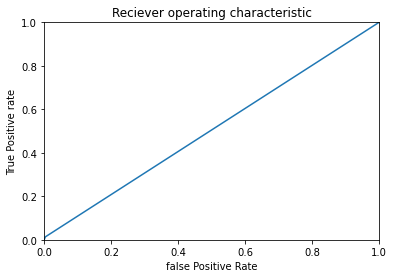

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

### Looking at the ROC curve / AUC metric the DT model is a very poor predictor 

## Feature importance

In [136]:
imp_df = pd.DataFrame(DTClassifier.feature_importances_, columns = ["Imp"], index = X.columns)

In [137]:
print (imp_df)

                                    Imp
var3                           0.004687
var15                          0.249777
imp_ent_var16_ult1             0.004571
imp_op_var39_comer_ult1        0.002655
imp_op_var39_comer_ult3        0.002861
...                                 ...
saldo_medio_var13_corto_ult3   0.000000
saldo_medio_var13_largo_hace2  0.000000
saldo_medio_var13_largo_ult1   0.000000
saldo_medio_var13_largo_ult3   0.000000
var38                          0.136194

[162 rows x 1 columns]


In [151]:
imp_df.to_csv('C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Feature_imp.csv')

## Top 20 Features 

In [ ]:
var15	0.249777266
saldo_var30	0.189863225
var38	0.136193577
saldo_medio_var5_ult1	0.027672407
saldo_medio_var5_hace3	0.026531873
num_op_var39_ult3	0.017832093
saldo_var42	0.016647313
ind_var26_cte	0.01623491
num_var42_0	0.014025622
saldo_medio_var5_ult3	0.013982262
imp_op_var39_ult1	0.01252492
saldo_medio_var5_hace2	0.0124793
num_var45_hace3	0.01185849
num_var45_ult1	0.010719316
num_var22_ult1	0.010190098
var36	0.009542696
num_op_var39_ult1	0.009465291
num_var8_0	0.009419003
saldo_medio_var8_ult3	0.008701502


### Var15 is most important in predicting customer satisfaction

# DT model 2

In [81]:
DTClassifier2 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 7)
DTClassifier2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=7)

In [82]:
Y_predict = DTClassifier2.predict(X_test)
metrics.accuracy_score(y_test,Y_predict)

0.9611067263000964

In [83]:
DTClassifier2.score(X_train ,y_train)

0.960217236065697

In [84]:
DTClassifier2.score(X_test ,y_test) 

0.9611067263000964

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predict)
print(cm)

[[21918     2]
 [  885     1]]


In [86]:
print(metrics.classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.33      0.00      0.00       886

    accuracy                           0.96     22806
   macro avg       0.65      0.50      0.49     22806
weighted avg       0.94      0.96      0.94     22806



Area Under the curve 0.5005187136478226


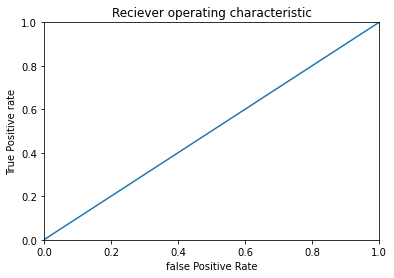

In [87]:
fpr, tpr, _ = metrics.roc_curve(y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

# DT model 3

In [73]:
DTClassifier3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, max_leaf_nodes = 10)
DTClassifier3 

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=10)

In [74]:
DTClassifier3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=10)

In [75]:
Y_predict = DTClassifier3.predict(X_test)
metrics.accuracy_score(y_test,Y_predict)

0.9611505744102429

In [76]:
DTClassifier3.score(X_train ,y_train)

0.9601232758296688

In [152]:
DTClassifier3.score(X_test ,y_test) 

0.9611505744102429

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predict)
print(cm)

[[21920     0]
 [  886     0]]


In [79]:
print(metrics.classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21920
           1       0.00      0.00      0.00       886

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



C:\Users\akorade1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akorade1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akorade1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Area Under the curve 0.5


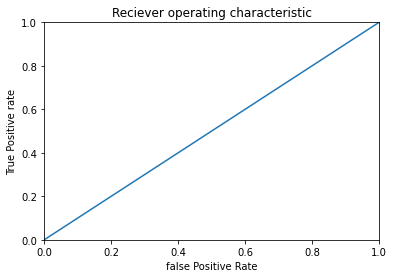

In [80]:
fpr, tpr, _ = metrics.roc_curve(y_test,Y_predict)
roc_auc = metrics.auc(fpr, tpr)
print('Area Under the curve', roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating characteristic')
plt.show()

#### From the ROC and auc we can see the that the model classification is very poor and the scores are high because of the class imbalance.
#### The classification report also shows poor recall and precision.

#### All the above models had high scores but the AUC score was very poor and the Precision and recall values were also poor.

#### In this sense, accuracy can be a misleading metric of the quality of our model.

# Test Dataset Predictions

In [111]:
TestData = pd.read_csv ("C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Test.csv")
TestData.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   2     2     32                 0.0                      0.0   
1   5     2     35                 0.0                      0.0   
2   6     2     23                 0.0                      0.0   
3   7     2     24                 0.0                      0.0   
4   9     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var29_ult3  saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var33_ult1  saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0                      0.0   
3                     0.0                     0.0                      0.0   
4                     0.0                     0.0                      0.0   

   saldo_medio_var44_hace3  saldo_medio_var44_ult1  saldo_medio_var44_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

       var38  
0   40532.10  
1   45486.72  
2   46993.95  
3  187898.61  
4   73649.73  

[5 rows x 370 columns]

## Dropping columns from test

### These columns had 100 % of the data missing, they dont have anypredictive powe hance dropped these columns

In [112]:
Test_new = TestData.drop(columns = ["ID","ind_var2_0",
"ind_var2",
"ind_var27_0",
"ind_var28_0",
"ind_var28",
"ind_var27",
"ind_var41",
"ind_var46_0",
"ind_var46",
"num_var27_0",
"num_var28_0",
"num_var28",
"num_var27",
"num_var41",
"num_var46_0",
"num_var46",
"saldo_var28",
"saldo_var27",
"saldo_var41",
"saldo_var46",
"imp_amort_var18_hace3",
"imp_amort_var34_hace3",
"imp_reemb_var13_hace3",
"imp_reemb_var33_hace3",
"imp_trasp_var17_out_hace3",
"imp_trasp_var33_out_hace3",
"num_var2_0_ult1",
"num_var2_ult1",
"num_reemb_var13_hace3",
"num_reemb_var33_hace3",
"num_trasp_var17_out_hace3",
"num_trasp_var33_out_hace3",
"saldo_var2_ult1",
"saldo_medio_var13_medio_hace3",
"delta_imp_reemb_var33_1y3",
"delta_imp_trasp_var33_out_1y3",
"delta_num_reemb_var33_1y3",
"delta_num_trasp_var33_out_1y3",
"imp_reemb_var17_hace3",
"imp_reemb_var33_ult1",
"imp_trasp_var33_out_ult1",
"num_reemb_var17_hace3",
"num_reemb_var33_ult1",
"num_trasp_var33_out_ult1",
"saldo_medio_var29_hace3",
"ind_var6",
"ind_var13_medio_0",
"ind_var13_medio",
"ind_var18_0",
"ind_var18",
"ind_var29",
"ind_var34_0",
"ind_var34",
"num_var6",
"num_var13_medio_0",
"num_var13_medio",
"num_var18_0",
"num_var18",
"num_var29",
"num_var34_0",
"num_var34",
"saldo_var6",
"saldo_var13_medio",
"saldo_var18",
"saldo_var29",
"saldo_var34",
"delta_imp_amort_var18_1y3",
"delta_imp_amort_var34_1y3",
"imp_amort_var18_ult1",
"imp_amort_var34_ult1",
"imp_trasp_var17_in_hace3",
"num_meses_var13_medio_ult3",
"num_trasp_var17_in_hace3",
"saldo_medio_var13_medio_hace2",
"saldo_medio_var13_medio_ult1",
"saldo_medio_var13_medio_ult3",
"imp_var7_emit_ult1",
"imp_venta_var44_hace3",
"ind_var7_emit_ult1",
"num_var7_emit_ult1",
"num_venta_var44_hace3",
"saldo_medio_var29_ult1",
"saldo_medio_var29_ult3",
"delta_imp_trasp_var17_out_1y3",
"delta_num_trasp_var17_out_1y3",
"imp_trasp_var17_in_ult1",
"imp_trasp_var17_out_ult1",
"num_trasp_var17_in_ult1",
"num_trasp_var17_out_ult1",
"saldo_medio_var29_hace2",
"imp_trasp_var33_in_ult1",
"num_meses_var29_ult3",
"num_trasp_var33_in_ult1",
"delta_imp_trasp_var17_in_1y3",
"delta_num_trasp_var17_in_1y3",
"imp_trasp_var33_in_hace3",
"num_trasp_var33_in_hace3",
"num_op_var40_hace3",
"imp_aport_var33_ult1",
"num_aport_var33_ult1",
"ind_var6_0",
"ind_var29_0",
"num_var6_0",
"num_var29_0",
"delta_imp_trasp_var33_in_1y3",
"delta_num_trasp_var33_in_1y3",
"saldo_medio_var17_hace3",
"delta_num_aport_var33_1y3",
"imp_reemb_var17_ult1",
"num_reemb_var17_ult1",
"delta_imp_reemb_var17_1y3",
"delta_num_reemb_var17_1y3",
"imp_aport_var17_hace3",
"num_aport_var17_hace3",
"imp_aport_var33_hace3",
"num_aport_var33_hace3",
"delta_imp_aport_var33_1y3",
"saldo_medio_var33_hace3",
"imp_compra_var44_hace3",
"num_compra_var44_hace3",
"saldo_medio_var44_hace3",
"imp_op_var40_efect_ult1",
"delta_imp_reemb_var13_1y3",
"delta_num_reemb_var13_1y3",
"imp_reemb_var13_ult1",
"num_op_var40_efect_ult1",
"num_reemb_var13_ult1",
"saldo_medio_var33_hace2",
"imp_aport_var17_ult1",
"imp_venta_var44_ult1",
"num_aport_var17_ult1",
"num_venta_var44_ult1",
"imp_op_var40_efect_ult3",
"delta_imp_venta_var44_1y3",
"delta_num_venta_var44_1y3",
"num_op_var40_efect_ult3",
"ind_var33",
"num_var33",
"saldo_var33",
"num_meses_var33_ult3",
"saldo_medio_var33_ult1",
"saldo_medio_var33_ult3",
"ind_var33_0",
"num_var33_0",
"delta_num_aport_var17_1y3",
"delta_imp_aport_var17_1y3",
"ind_var32_0",
"ind_var32",
"num_var32_0",
"num_var32",
"saldo_var32",
"imp_compra_var44_ult1",
"num_compra_var44_ult1",
"saldo_medio_var17_hace2",
"ind_var32_cte",
"imp_sal_var16_ult1",
"num_sal_var16_ult1",
"delta_num_compra_var44_1y3",
"saldo_medio_var44_hace2",
"num_op_var40_hace2",
"delta_imp_compra_var44_1y3",
"ind_var17",
"num_var17",
"saldo_var17",
"saldo_medio_var17_ult1",
"saldo_medio_var17_ult3",
"num_meses_var17_ult3",
"ind_var44",
"num_var44",
"saldo_var44",
"ind_var17_0",
"num_var17_0",
"saldo_medio_var44_ult1",
"saldo_medio_var44_ult3",
"ind_var44_0",
"num_var44_0",
"num_meses_var44_ult3",
"ind_var20",
"num_var20",
"saldo_var20",
"imp_var7_recib_ult1",
"ind_var7_recib_ult1",
"num_var7_recib_ult1",
"imp_op_var40_ult1",
"num_op_var40_ult1",
"num_op_var40_ult3",
"ind_var20_0",
"num_var20_0",
"ind_var31",
"num_var31",
"saldo_var31",
"ind_var40",
"ind_var39",
"num_var40",
"num_var39",
"saldo_var40",
"ind_var1",
"num_var1",
"saldo_var1",
"imp_op_var40_comer_ult1",
"num_op_var40_comer_ult1",
"saldo_medio_var13_largo_hace3",
"ind_var19",
"ind_var31_0",
"num_var31_0",
"imp_op_var40_comer_ult3",
"num_op_var40_comer_ult3"])


In [113]:
Test_new.head()

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0     2     32                 0.0                      0.0   
1     2     35                 0.0                      0.0   
2     2     23                 0.0                      0.0   
3     2     24                 0.0                      0.0   
4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  ...  \
0                      0.0                      0.0                0.0  ...   
1                      0.0                      0.0                0.0  ...   
2                     60.0                     60.0               60.0  ...   
3                      0.0                      0.0                0.0  ...   
4                      0.0                      0.0                0.0  ...   

   saldo_medio_var12_ult1  saldo_medio_var12_ult3  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

   saldo_medio_var13_corto_hace2  saldo_medio_var13_corto_hace3  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   saldo_medio_var13_corto_ult1  saldo_medio_var13_corto_ult3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   saldo_medio_var13_largo_hace2  saldo_medio_var13_largo_ult1  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2                            0.0                           0.0   
3                            0.0                           0.0   
4                            0.0                           0.0   

   saldo_medio_var13_largo_ult3      var38  
0                           0.0   40532.10  
1                           0.0   45486.72  
2                           0.0   46993.95  
3                           0.0  187898.61  
4                           0.0   73649.73  

[5 rows x 162 columns]

## Scaling Test data

In [114]:
Test_Scaled = independent_scaler.fit_transform(Test_new)

In [115]:
Test_Scaled

array([[ 3.97953966e-02, -8.80637178e-02, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02, -3.09975237e-01],
       [ 3.97953966e-02,  1.43920495e-01, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02, -2.89991833e-01],
       [ 3.97953966e-02, -7.84016356e-01, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02, -2.83912742e-01],
       ...,
       [ 3.97953966e-02, -7.06688285e-01, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02,  2.01315149e-01],
       [ 3.97953966e-02,  5.30560850e-01, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02, -3.03988265e-04],
       [ 3.97953966e-02, -7.84016356e-01, -4.90684752e-02, ...,
        -6.38691822e-02, -6.39888564e-02, -3.03988265e-04]])

In [117]:
Final_predictions = DTClassifier.predict(Test_Scaled)

In [139]:
Final_prob = DTClassifier.predict_proba(Test_Scaled)

In [118]:
Final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
Final_prob

array([[0.95448276, 0.04551724],
       [0.95448276, 0.04551724],
       [0.9982187 , 0.0017813 ],
       ...,
       [0.99645809, 0.00354191],
       [0.95448276, 0.04551724],
       [0.9982187 , 0.0017813 ]])

In [119]:
ids_df = pd.read_csv('C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Test.csv')
ids_df = ids_df[["ID"]]

In [145]:
Final_predictions_prob = pd.DataFrame(Final_prob)

In [146]:
Final_predictions_prob.head()

0         1
0  0.954483  0.045517
1  0.954483  0.045517
2  0.998219  0.001781
3  0.996458  0.003542
4  0.998219  0.001781

In [148]:
Final_predictions_prob = Final_predictions_prob.rename(columns = {0:'Satisfied', 1:'Not satisfied'})

<AxesSubplot:ylabel='TARGET'>

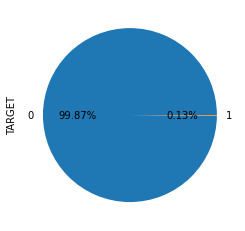

In [123]:
#Final_predictions.TARGET.value_counts().plot.pie(autopct='%1.2f%%')

## Model predicted 99.87% of population is satisfied and 0.13% is not satified

In [149]:
output_df = pd.merge(ids_df,Final_predictions_prob,how = 'left',left_index = True, right_index = True)

In [150]:
output_df.to_csv('C:\\Users\\akorade1\\Documents\\CIS-508\\Customer_satisfaction\\Kaggle_op.csv')  